# Objetivo1: criar a função que plota pontos de massa no espaço 3D:

In [1]:
# Importanto bibliotecas necessárias para utilização das funções específicas do python:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pylab as py
from itertools import product, combinations
#%matplotlib tk
%matplotlib inline

In [2]:
# importando funcoes locais no diretorio modules:
from modules.plots import points3D, prism3D

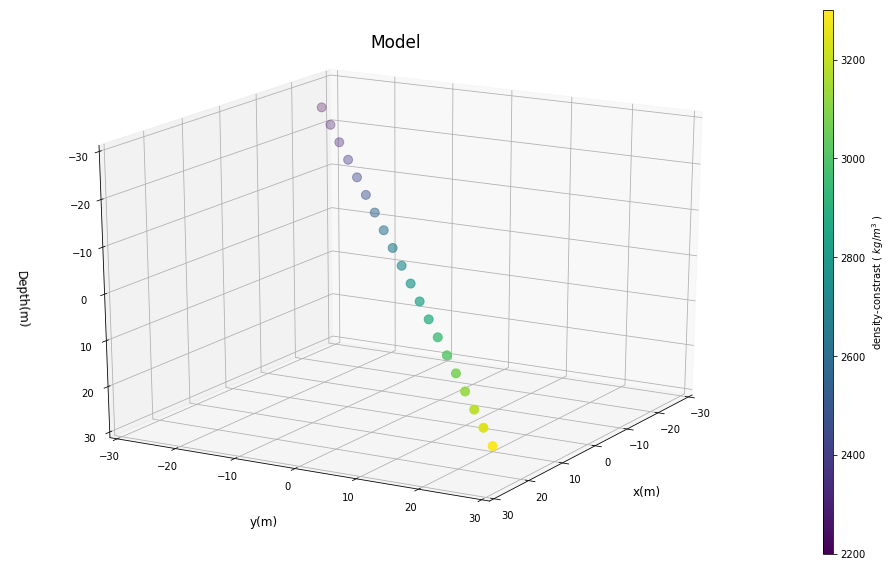

In [3]:
x = np.linspace(-10.0, 10.0, 20)
y = np.linspace(-20.0, 20.0, 20)
z = np.linspace(-30.0, 30.0, 20)
r = np.linspace(1.0, 1.0, 20)
dens = np.linspace(2200., 3300., 20)
model = [ x, y, z, r, dens ]
#md = np.array(model)
#print md[0,:]
area = [-30.0, 30.0, -30.0, 30.0, -30.0, 30.0]
py.rcParams['figure.figsize'] = (15.0, 10.0) #Redimensiona a figura
fig = plt.figure()
points3D(fig, model, 20, 30, area, xlabel = 'x(m)', ylabel = 'y(m)', zlabel = 'Depth(m)', title = 'Model')

## Objetivo2: Teste para verificar se a funcao prism3D do modulo plots.py esta funcionando:

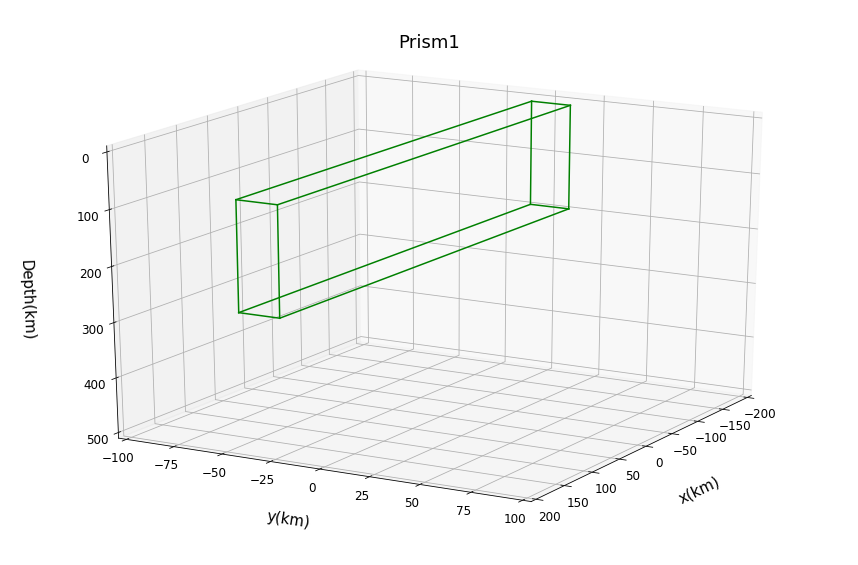

In [4]:
# definindo os limites do prisma:
py.rcParams['figure.figsize'] = (15.0, 10.0) #Redimensiona a figura
fig = plt.figure()
area = [-200.0, 200.0, -100.0, 100.0, 0.0, 500.0]
prism1 = [-200.0, 300.0, -10.0, 10.0, 10.0, 200.0, 2670.0]
#prism2 = [-100.0, 100.0, -100.0, 100.0, 0.5, 350.0, 3170.0]
    
prism3D(fig, prism1, 'green', 20, 30, area, 'x(km)', 'y(km)', 'Depth(km)', 'Prism1')
#prism3D(fig, prism2, 'red', 20, 30, area, 'x(km)', 'y(km)', 'Depth(km)', 'Prism2')

### Computando $g_z$ de fontes pontuais atraves da funcao modulo sphere.py:

In [5]:
# importing local functions:
from modules.sphere import sphere_gz # Gravity vertical attraction

In [6]:
# definicao do grid de observacoes:
# Positions and number of points
nx = 200
x = np.linspace(-5000, 5000, nx)
ny = 200
y = np.linspace(-5000, 5000, ny)
z = -100.
# Computes the mesh of all points
X, Y = np.meshgrid(x, y)

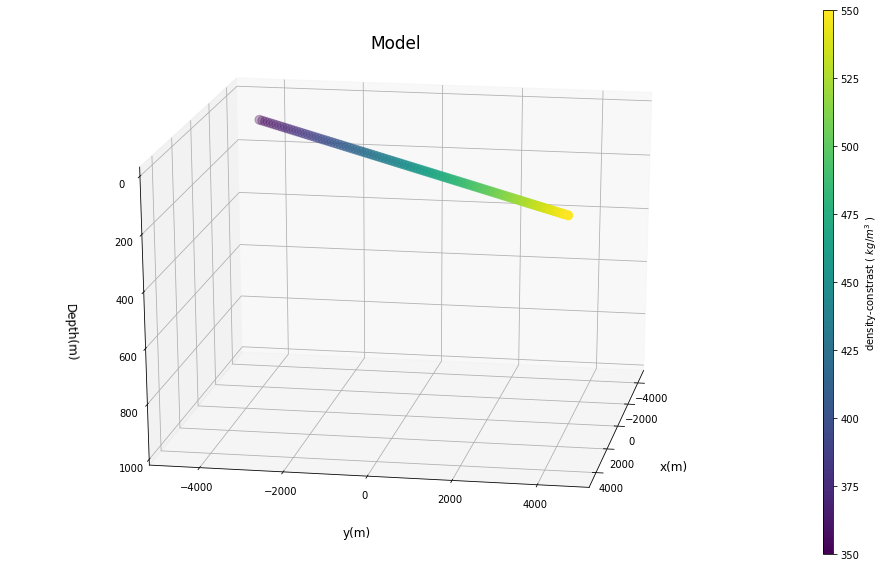

In [7]:
# definindo as propriedades das fontes pontuais:
ns = 100
xc = np.linspace(-4500.0, 4500.0, ns)
yc = np.linspace(-4500.0, 4500.0, ns)
zc = np.linspace( 100.0, 100.0, ns)
raio = np.linspace(1000.0,1000.0,ns) 
dens = np.linspace(350., 550., ns)
model = [ xc, yc, zc, raio ,dens ]
area = [-5000.0, 5000.0, -5000.0, 5000.0, -10.0, 1000.0]
py.rcParams['figure.figsize'] = (15.0, 10.0) #Redimensiona a figura
fig = plt.figure()
points3D(fig, model, 20, 10, area, xlabel = 'x(m)', ylabel = 'y(m)', zlabel = 'Depth(m)', title = 'Model')

In [9]:
# Calculating the gravity attraction for all point masses:
gz = 0.0
# range of all masses:
for i in range(ns):
    source=[]
    xc  = model[0][i]
    yc  = model[1][i]
    zc  = model[2][i]
    r   = model[3][i]
    den = model[4][i]
    source = ( [xc,yc,zc,r,den] ) # calling one source a time:
    #print source
    gz += sphere_gz(X, Y, z, source) # sum the effect of all masses 


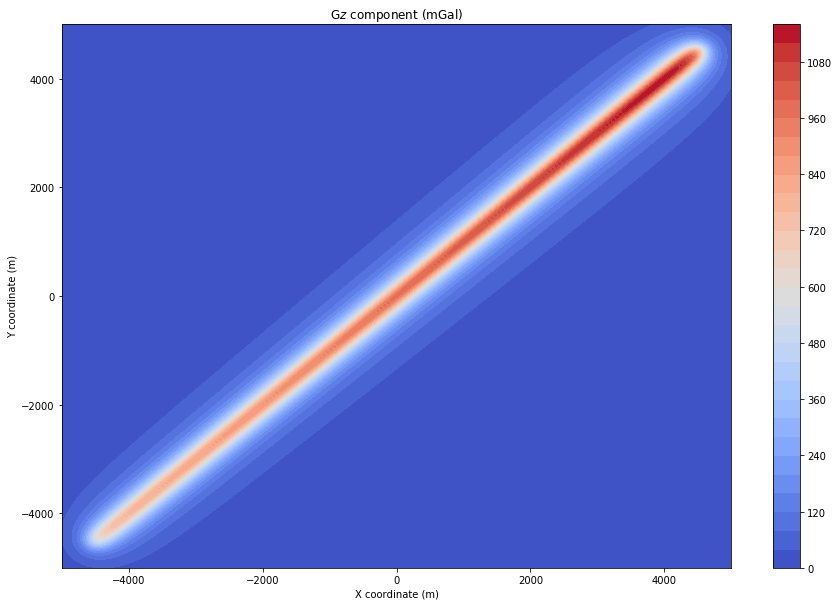

In [10]:
# Ploting all results 
plt.close('all')
plt.figure(figsize=(20,14))
############ gz ################################
plt.figure()
plt.title('G$z$ component (mGal)')
plt.contourf(X, Y, gz, 30, cmap = plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')
plt.show()

In [ ]:
# calculate the effect of the prism (dike model):
